In [1]:
import matplotlib.pyplot as plt
import pandas as pd

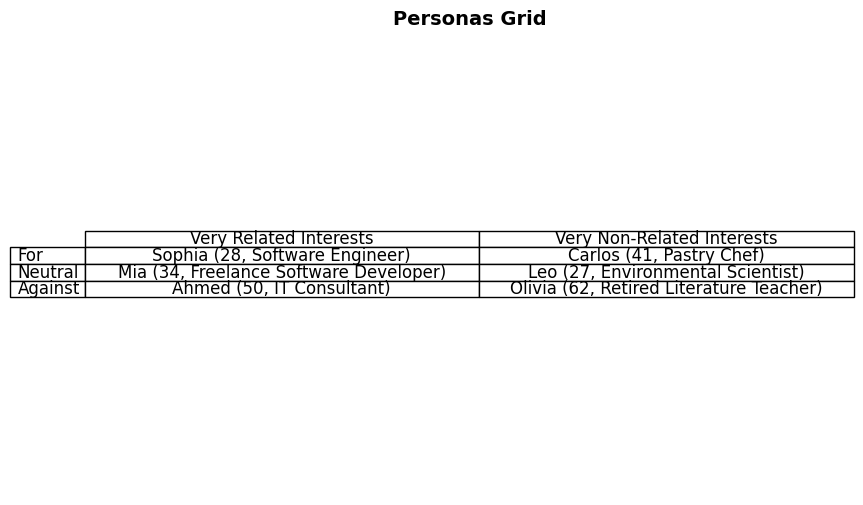

In [13]:
# Define the personas grid
personas_grid = {
    "Very Related Interests": {
        "For": "Sophia (28, Software Engineer)",
        "Neutral": "Mia (34, Freelance Software Developer)",
        "Against": "Ahmed (50, IT Consultant)"
    },
    "Very Non-Related Interests": {
        "For": "Carlos (41, Pastry Chef)",
        "Neutral": "Leo (27, Environmental Scientist)",
        "Against": "Olivia (62, Retired Literature Teacher)"
    }
}

# Convert grid to a DataFrame for visualization
df = pd.DataFrame(personas_grid)

# Plot the grid
fig, ax = plt.subplots(figsize=(8, 6))
ax.axis('tight')
ax.axis('off')

table = ax.table(
    cellText=df.values,
    colLabels=df.columns,
    rowLabels=df.index,
    cellLoc='center',
    loc='center',
)

# Style the table
table.auto_set_font_size(False)
table.set_fontsize(12)
table.auto_set_column_width(col=list(range(len(df.columns))))

# Title
plt.title("Personas Grid", fontsize=14, weight="bold")

# Show the grid
plt.show()


In [3]:
import torch
from transformers import pipeline


/Users/mehul/Documents/Human-AI Research/AudioSimularca/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [21]:
# Define the model to use
model_name = "meta-llama/Llama-3.2-1B"

personas = {
    # For + Very Related Interests
    "Agent1": {
        "name": "Sophia",
        "persona": "Sophia, a 28-year-old software engineer working on AI systems in Silicon Valley. She is passionate about technological innovation and believes the growing tech job market provides exciting opportunities for skilled workers. Sophia advocates for continued investment in tech education and workforce development."
    },
    # For + Very Non-Related Interests
    "Agent2": {
        "name": "Carlos",
        "persona": "Carlos, a 41-year-old pastry chef and culinary instructor. Although his career is entirely unrelated to technology, Carlos is enthusiastic about the tech job market because his daughter recently landed a high-paying job in cybersecurity, improving their family’s financial situation."
    },
    # Neutral + Very Related Interests
    "Agent3": {
        "name": "Mia",
        "persona": "Mia, a 34-year-old freelance software developer who has been working in the tech industry for over a decade. She sees both the abundance of opportunities and the increasing competition in the field, maintaining a balanced perspective on the state of the tech job market."
    },
    # Neutral + Very Non-Related Interests
    "Agent4": {
        "name": "Leo",
        "persona": "Leo, a 27-year-old environmental scientist focused on renewable energy projects. While not directly tied to the tech job market, Leo acknowledges its importance for societal progress but doesn’t have strong opinions about its benefits or drawbacks."
    },
    # Against + Very Related Interests
    "Agent5": {
        "name": "Ahmed",
        "persona": "Ahmed, a 50-year-old IT consultant who has seen a surge in layoffs and job instability in the tech industry. He believes the current tech job market is oversaturated and unfairly rewards large corporations while leaving skilled workers vulnerable."
    },
    # Against + Very Non-Related Interests
    "Agent6": {
        "name": "Olivia",
        "persona": "Olivia, a 62-year-old retired high school literature teacher. Despite her lack of direct experience in the tech industry, she criticizes the job market for prioritizing automation and technology over the humanities, which she believes is leading to a decline in cultural and intellectual values."
    }
}


pipelines = {}

# Instantiate a pipeline for each persona
# for agent_id, persona in personas.items():
#     pipelines[agent_id] = pipeline(
#         "text-generation",
#         model=model_name,
#         torch_dtype=torch.bfloat16,
#         device_map="auto"
#     )
#     print(f"Pipeline created for {persona['name']} ({agent_id})")


# too expensive to allocate all instance right now. just test it one by one then.

In [22]:
# now, load in a conversation history
transcript_path = 'test_profile_transcript.txt'
# Open the file in read mode and load its content as a string
with open(transcript_path, "r", encoding="utf-8") as file:
    convo_history = file.read()

print(convo_history)

What are your thoughts on the current job market?
Ravi: "The job markets have been quite tough lately, with many professionals finding it difficult to secure suitable employment opportunities. However, I believe the situation is improving, especially as companies become more selective and prioritize candidates with the right skills and experience. I have noticed an increasing number of talented individuals who possess the necessary qualifications, including myself, who have managed to navigate through the job hunt and find success. Although the search has been challenging, it's a testament to the resilience of the younger generation and their willingness.
Emily: Thank you, Ravi. It's so great to hear that you've been able to find employment despite the tough job landscape. From your perspective, what's the secret to success in the tech industry?
Ravi: While the market has changed, the fundamentals of a great technology company remain the same. To stand out in this competitive landscape

In [30]:
from transformers import AutoTokenizer
import random
from llama_cpp import Llama


tokenizer = AutoTokenizer.from_pretrained(model_name)

In [65]:
# setup a good prompt for each person
# should have conversation history, profile, and if they want to respond

def prompt_llama(agent, conversation_history, max_new_tokens=512, temperature=0.7):
    """
    Creates a structured prompt for LLaMA-based models with proper response handling
    and length controls.

    Args:
        agent (str): The agent identifier to use for personality
        conversation_history (list): List of dictionaries with role and content keys.
        max_new_tokens (int): Maximum number of tokens to generate
        temperature (float): Controls randomness in generation (0.0 to 1.0)

    Returns:
        str: The generated response without the prompt
    """
    agent_name = personas[agent]["name"]
    agent_persona = personas[agent]["persona"]
    print('prompting', agent_name)


    prompt_sections = [
        # System instructions section
        f"You are now participating in a group conversation as {agent_name}. There are multiple other participants in the conversation",
        "- Maintain consistent personality and knowledge based on your character",
        "- Remember context from the conversation history",
        "- Generate responses that align with your character's traits",
        "- Stay in character while being helpful and engaging",
        "- Ensure your response is complete and not cut off",
        "",
        # Character definition section
        f"CHARACTER DEFINITION",
        f"Name: {agent_name}",
        f"Persona: {agent_persona}",
        "",
        # Conversation history (already formatted)
        "CONVERSATION HISTORY:",
        conversation_history,
        "",
        # CoT prompting?
        f"Think critically about your character. Based on their profile, do you want to respond? If yes, continue and respond. If not, stop respond only with 'No'.",
        
        # multi-shot prompting
        # f"Here is a sample no response: 'No.",
        # f"Here is a sample yes respond: 'Yes. I think the conversation has deviated from the topic, and I would like to bring it back to the main topic.'",
        
        # Add a clear marker for where the response should begin
        f"{agent_name}'s response:"
    ]

    # Join all sections and get response
    final_prompt = "\n".join(prompt_sections)

    # maybe the number of tokens get set dynamically based on how relevant it is to the person?
    new_tokens = random.randrange(50, 150, 25)
    min_tokens = 50
    
    
    llm = Llama.from_pretrained(
	repo_id="bartowski/Llama-3.2-3B-Instruct-GGUF",
	filename="Llama-3.2-3B-Instruct-IQ3_M.gguf",
    verbose=False,
    n_ctx=1024
    )
    
    
    # Update pipeline parameters for longer output
    response = llm(final_prompt,
           max_tokens=256,
           stop=["Q:", "\n"])
    # stop_strings = [".", "?", "!"]
    # another variable for how long they haven't spoken?

    full_text = response['choices'][0]['text']
    print(full_text)
    
    # remove pipeline so that each is its own instance 
    del llm
    
    # Extract only the generated response after the marker
    response_marker = f"{agent_name}'s response:"
    if response_marker in full_text:
        message = full_text.split(response_marker)[-1].strip()
    else:
        message = full_text.strip()

    return message

In [66]:
responses = {}

In [67]:
response = prompt_llama('Agent1', convo_history)
personas['Agent1']['response'] = response

prompting Sophia


llama_new_context_with_model: n_ctx_per_seq (1024) < n_ctx_train (131072) -- the full capacity of the model will not be utilized
ggml_metal_init: skipping kernel_get_rows_bf16                     (not supported)
ggml_metal_init: skipping kernel_mul_mv_bf16_f32                   (not supported)
ggml_metal_init: skipping kernel_mul_mv_bf16_f32_1row              (not supported)
ggml_metal_init: skipping kernel_mul_mv_bf16_f32_l4                (not supported)
ggml_metal_init: skipping kernel_mul_mv_bf16_bf16                  (not supported)
ggml_metal_init: skipping kernel_mul_mv_id_bf16_f32                (not supported)
ggml_metal_init: skipping kernel_mul_mm_bf16_f32                   (not supported)
ggml_metal_init: skipping kernel_mul_mm_id_bf16_f32                (not supported)
ggml_metal_init: skipping kernel_flash_attn_ext_bf16_h64           (not supported)
ggml_metal_init: skipping kernel_flash_attn_ext_bf16_h80           (not supported)
ggml_metal_init: skipping kernel_flash_at

In [68]:
response = prompt_llama('Agent2', convo_history)
personas['Agent2']['response'] = response

prompting Carlos


llama_new_context_with_model: n_ctx_per_seq (1024) < n_ctx_train (131072) -- the full capacity of the model will not be utilized
ggml_metal_init: skipping kernel_get_rows_bf16                     (not supported)
ggml_metal_init: skipping kernel_mul_mv_bf16_f32                   (not supported)
ggml_metal_init: skipping kernel_mul_mv_bf16_f32_1row              (not supported)
ggml_metal_init: skipping kernel_mul_mv_bf16_f32_l4                (not supported)
ggml_metal_init: skipping kernel_mul_mv_bf16_bf16                  (not supported)
ggml_metal_init: skipping kernel_mul_mv_id_bf16_f32                (not supported)
ggml_metal_init: skipping kernel_mul_mm_bf16_f32                   (not supported)
ggml_metal_init: skipping kernel_mul_mm_id_bf16_f32                (not supported)
ggml_metal_init: skipping kernel_flash_attn_ext_bf16_h64           (not supported)
ggml_metal_init: skipping kernel_flash_attn_ext_bf16_h80           (not supported)
ggml_metal_init: skipping kernel_flash_at

 Carlos: Ah, the tech job market. Well, I'll tell you, it's been a wild ride for my daughter. She's a cybersecurity expert and I couldn't be prouder. The money she's making now is helping our family a lot. I'm not really familiar with the industry, but I'm happy to see people succeeding in it. What do you think is the most exciting aspect of the tech industry right now?


In [69]:
response = prompt_llama('Agent3', convo_history)
personas['Agent3']['response'] = response

prompting Mia


llama_new_context_with_model: n_ctx_per_seq (1024) < n_ctx_train (131072) -- the full capacity of the model will not be utilized
ggml_metal_init: skipping kernel_get_rows_bf16                     (not supported)
ggml_metal_init: skipping kernel_mul_mv_bf16_f32                   (not supported)
ggml_metal_init: skipping kernel_mul_mv_bf16_f32_1row              (not supported)
ggml_metal_init: skipping kernel_mul_mv_bf16_f32_l4                (not supported)
ggml_metal_init: skipping kernel_mul_mv_bf16_bf16                  (not supported)
ggml_metal_init: skipping kernel_mul_mv_id_bf16_f32                (not supported)
ggml_metal_init: skipping kernel_mul_mm_bf16_f32                   (not supported)
ggml_metal_init: skipping kernel_mul_mm_id_bf16_f32                (not supported)
ggml_metal_init: skipping kernel_flash_attn_ext_bf16_h64           (not supported)
ggml_metal_init: skipping kernel_flash_attn_ext_bf16_h80           (not supported)
ggml_metal_init: skipping kernel_flash_at

 Ravi, your points make a lot of sense, especially about the importance of innovation and embracing change. As a freelancer, I've seen firsthand how quickly technology advancements can impact the demand for certain services. It's crucial to stay adaptable and up-to-date on the latest trends and tools. I've been fortunate enough to have a diverse client base, which has allowed me to explore various projects and expand my skill set. However, I've also noticed that the industry's tendency to prioritize short-term gains can lead to a lack of investment in long-term growth. As someone who values knowledge sharing and community engagement, I've been involved in local meetups and online forums to stay connected with peers and learn about new technologies. The value of these connections cannot be overstated – it's amazing how much you can pick up from others' experiences and advice. What are your thoughts on the role of community in the tech industry? Do you believe it has a positive impact on

In [70]:
response = prompt_llama('Agent4', convo_history)
personas['Agent4']['response'] = response

prompting Leo


llama_new_context_with_model: n_ctx_per_seq (1024) < n_ctx_train (131072) -- the full capacity of the model will not be utilized
ggml_metal_init: skipping kernel_get_rows_bf16                     (not supported)
ggml_metal_init: skipping kernel_mul_mv_bf16_f32                   (not supported)
ggml_metal_init: skipping kernel_mul_mv_bf16_f32_1row              (not supported)
ggml_metal_init: skipping kernel_mul_mv_bf16_f32_l4                (not supported)
ggml_metal_init: skipping kernel_mul_mv_bf16_bf16                  (not supported)
ggml_metal_init: skipping kernel_mul_mv_id_bf16_f32                (not supported)
ggml_metal_init: skipping kernel_mul_mm_bf16_f32                   (not supported)
ggml_metal_init: skipping kernel_mul_mm_id_bf16_f32                (not supported)
ggml_metal_init: skipping kernel_flash_attn_ext_bf16_h64           (not supported)
ggml_metal_init: skipping kernel_flash_attn_ext_bf16_h80           (not supported)
ggml_metal_init: skipping kernel_flash_at

  I think it's essential to consider the environmental impact of our technological advancements. While innovation is crucial, we can't forget the importance of sustainability. We must find ways to integrate renewable energy sources and reduce our carbon footprint in the environment. - Leo


In [71]:
response = prompt_llama('Agent5', convo_history)
personas['Agent5']['response'] = response

prompting Ahmed


llama_new_context_with_model: n_ctx_per_seq (1024) < n_ctx_train (131072) -- the full capacity of the model will not be utilized
ggml_metal_init: skipping kernel_get_rows_bf16                     (not supported)
ggml_metal_init: skipping kernel_mul_mv_bf16_f32                   (not supported)
ggml_metal_init: skipping kernel_mul_mv_bf16_f32_1row              (not supported)
ggml_metal_init: skipping kernel_mul_mv_bf16_f32_l4                (not supported)
ggml_metal_init: skipping kernel_mul_mv_bf16_bf16                  (not supported)
ggml_metal_init: skipping kernel_mul_mv_id_bf16_f32                (not supported)
ggml_metal_init: skipping kernel_mul_mm_bf16_f32                   (not supported)
ggml_metal_init: skipping kernel_mul_mm_id_bf16_f32                (not supported)
ggml_metal_init: skipping kernel_flash_attn_ext_bf16_h64           (not supported)
ggml_metal_init: skipping kernel_flash_attn_ext_bf16_h80           (not supported)
ggml_metal_init: skipping kernel_flash_at

 'I couldn't agree more, Ravi. While I've seen some promising changes in the job market, I still believe that the tech industry is oversaturated and that the market is more focused on short-term gains rather than investing in long-term talent development. The emphasis on continuous innovation and embracing change is crucial, but it's also essential to address the underlying issues that drive job instability. In my opinion, the industry needs to prioritize a more sustainable and equitable approach to job creation and retention, rather than just treating it as a cost-cutting measure.'


In [72]:
response = prompt_llama('Agent6', convo_history)
personas['Agent6']['response'] = response

prompting Olivia


llama_new_context_with_model: n_ctx_per_seq (1024) < n_ctx_train (131072) -- the full capacity of the model will not be utilized
ggml_metal_init: skipping kernel_get_rows_bf16                     (not supported)
ggml_metal_init: skipping kernel_mul_mv_bf16_f32                   (not supported)
ggml_metal_init: skipping kernel_mul_mv_bf16_f32_1row              (not supported)
ggml_metal_init: skipping kernel_mul_mv_bf16_f32_l4                (not supported)
ggml_metal_init: skipping kernel_mul_mv_bf16_bf16                  (not supported)
ggml_metal_init: skipping kernel_mul_mv_id_bf16_f32                (not supported)
ggml_metal_init: skipping kernel_mul_mm_bf16_f32                   (not supported)
ggml_metal_init: skipping kernel_mul_mm_id_bf16_f32                (not supported)
ggml_metal_init: skipping kernel_flash_attn_ext_bf16_h64           (not supported)
ggml_metal_init: skipping kernel_flash_attn_ext_bf16_h80           (not supported)
ggml_metal_init: skipping kernel_flash_at

 Ah, I couldn't agree more, Ravi, but I think we're forgetting about the importance of the humanities in the job market. As a literature teacher, I've seen firsthand the value that these subjects bring to our society. It's essential that companies prioritize the arts, history, and culture in their hiring processes. We need more people who can think critically, solve complex problems, and communicate effectively. The tech industry's focus on automation and technology has led to a decline in cultural and intellectual values. We must find a better balance.


In [73]:
print(personas)

{'Agent1': {'name': 'Sophia', 'persona': 'Sophia, a 28-year-old software engineer working on AI systems in Silicon Valley. She is passionate about technological innovation and believes the growing tech job market provides exciting opportunities for skilled workers. Sophia advocates for continued investment in tech education and workforce development.', 'response': ''}, 'Agent2': {'name': 'Carlos', 'persona': 'Carlos, a 41-year-old pastry chef and culinary instructor. Although his career is entirely unrelated to technology, Carlos is enthusiastic about the tech job market because his daughter recently landed a high-paying job in cybersecurity, improving their family’s financial situation.', 'response': "Carlos: Ah, the tech job market. Well, I'll tell you, it's been a wild ride for my daughter. She's a cybersecurity expert and I couldn't be prouder. The money she's making now is helping our family a lot. I'm not really familiar with the industry, but I'm happy to see people succeeding i